# HW 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [3]:
diamonds_df = pd.read_csv('diamonds.csv')

In [4]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


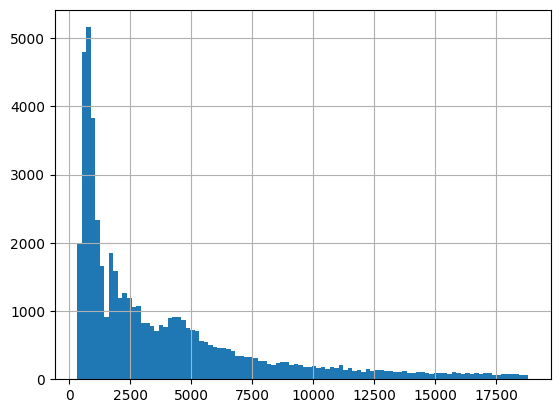

In [5]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [6]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [7]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [8]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [9]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [12]:
reg = LinearRegression().fit(X_train, y_train)

In [13]:
y_pred = reg.predict(X_test)

In [24]:
score = r2_score(y_test, y_pred)

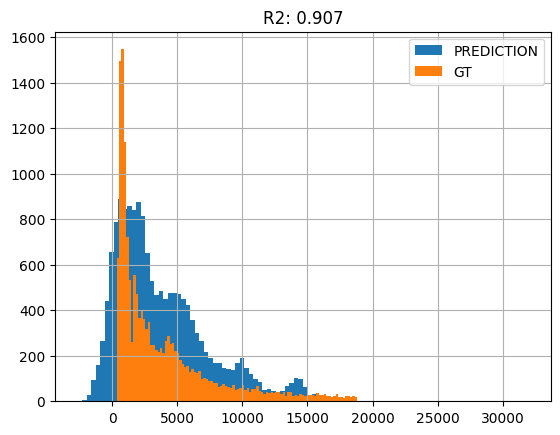

In [25]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [26]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tol = 0.001
        self.random_state = 42
        self.npr = np.random.RandomState(self.random_state)
        self.w = None
        self.bias = self.npr.uniform(-2, 2, size=1)[0]

    def get_loss(self, X, y):
        n = X.shape[0]
        return (X @ self.w + self.bias - y).T @ (X @ self.w + self.bias - y) / n

    def get_loss_grad(self, X, y):
        n = X.shape[0]
        return 2 * X.T @ (X @ self.w + self.bias - y) / n

    def get_loss_grad_bias(self, X, y):
        n = X.shape[0]
        return 2 * (self.bias * n + np.sum(X @ self.w) - np.sum(y)) / n

    def fit(self, X, y):
        self.w = self.npr.uniform(-2, 2, size=X.shape[1])

        x_train, y_train = X, np.asarray(y).ravel()

        loss = self.get_loss(x_train, y_train)
        best_loss = np.inf

        current_iter = 1

        while current_iter < self.n_iter \
                and best_loss - loss >= self.tol:
            best_loss = loss

            grad = self.get_loss_grad(x_train, y_train)
            w_new = self.w - self.learning_rate * grad
            self.w = w_new
            bias_new = self.bias - self.learning_rate * self.get_loss_grad_bias(x_train, y_train)
            self.bias = bias_new

            loss = self.get_loss(x_train, y_train)
            current_iter += 1

    def predict(self, X):
        return X @ self.w + self.bias

    def get_params(self):
        return {'weights': self.w, 'bias': self.bias}

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [41]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """
    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = 47
        self.npr = np.random.RandomState(self.random_state)
        self.w = None
        self.bias = self._init_bias()
        self.activations = [None] * (len(self.hidden_layer_sizes) + 2)
        self.z = [None] * (len(self.hidden_layer_sizes) + 1)

    def _init_bias(self):
        bias = []
        for i in range(len(self.hidden_layer_sizes) + 1):
            if i < len(self.hidden_layer_sizes):
                bias_size = self.hidden_layer_sizes[i]
            else:
                bias_size = 1
            bias_i = self.npr.uniform(-1, 1, size=bias_size)
            bias.append(bias_i)
        return bias

    def _init_w(self, n_features):
        w = []
        w_0 = self.npr.uniform(-1, 1, size=(n_features, self.hidden_layer_sizes[0]))
        w.append(w_0)
        n = len(self.hidden_layer_sizes)
        for i in range(n - 1):
            left_i = self.hidden_layer_sizes[i]
            right_i = self.hidden_layer_sizes[i+1]
            w_i = self.npr.randn(left_i, right_i) * 0.01
            w.append(w_i)
        w_n = self.npr.uniform(-1, 1, size=(self.hidden_layer_sizes[n-1], 1))
        w.append(w_n)
        return w

    @staticmethod
    def sigmoid(z):
        z = np.clip(z, -500, 500)
        return np.where(z >= 0,
                        1 / (1 + np.exp(-z)),
                        np.exp(z) / (1 + np.exp(z)))

    def sigmoid_derivative(self, i):
        a = self.activations[i]
        return a * (1 - a)

    def forward(self, X):
        curr_z = X
        n = len(self.w)
        self.z[0], self.activations[0] = X, X
        for i in range(1, n):
            z_i = curr_z @ self.w[i-1] + self.bias[i-1]
            a_i = self.sigmoid(z_i)
            self.z[i] = z_i
            self.activations[i] = a_i
            curr_z = a_i
        a_end = curr_z @ self.w[n-1] + self.bias[n-1]
        self.activations[n] = a_end

    def backward(self, X, y):
        y = y.reshape(-1, 1)
        n = len(self.w)

        grad_w = [None] * n
        grad_bias = [None] * n

        part_derv = 2 * (self.activations[-1] - y) / X.shape[0]

        grad_w[-1] = self.activations[-2].T @ part_derv
        grad_bias[-1] = np.sum(part_derv, axis=0)

        for i in reversed(range(n - 1)):
            part_derv = part_derv @ self.w[i + 1].T
            part_derv = part_derv * self.sigmoid_derivative(i + 1)

            grad_w[i] = self.activations[i].T @ part_derv
            grad_bias[i] = np.sum(part_derv, axis=0)

        return grad_w, grad_bias

    def fit(self, X, y):
        self.w = self._init_w(X.shape[1])
        count_w = len(self.w)

        x_train, y_train = X, y
        current_iter = 1

        while current_iter < self.n_iter:
            self.forward(X)
            grad_w, grad_bias = self.backward(X, y_train)

            for i in range(count_w):
                w_new = self.w[i] - self.learning_rate * grad_w[i]
                self.w[i] = w_new
                bias_new = self.bias[i] - self.learning_rate * grad_bias[i]
                self.bias[i] = bias_new

            current_iter += 1

    def predict(self, X):
        curr_z = X
        n = len(self.w)
        for i in range(n - 1):
            z_i = curr_z @ self.w[i] + self.bias[i]
            a_i = self.sigmoid(z_i)
            curr_z = a_i
        y_pred = curr_z @ self.w[n-1] + self.bias[n-1]
        return np.asarray(y_pred).ravel()

# Тестирование полученного решения

In [27]:
reg_gd = LinearRegressionGD(0.1)
reg_gd.fit(X_train, y_train)

In [28]:
y_pred_gd = reg_gd.predict(X_test)

In [29]:
score_gd = r2_score(y_test, y_pred_gd)

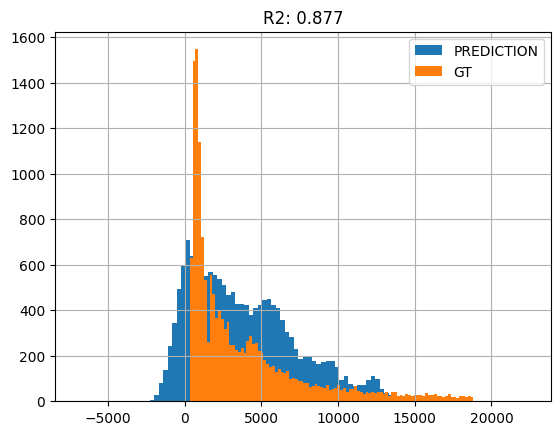

In [30]:
plt.title(f'R2: {str(score_gd)[:5]}')
plt.hist(y_pred_gd.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [42]:
reg_mlp = MLPRegressor(n_iter=1000)
reg_mlp.fit(X_train, y_train)

In [43]:
y_pred_mlp = reg_mlp.predict(X_test)

In [44]:
score_mlp = r2_score(y_test, y_pred_mlp)

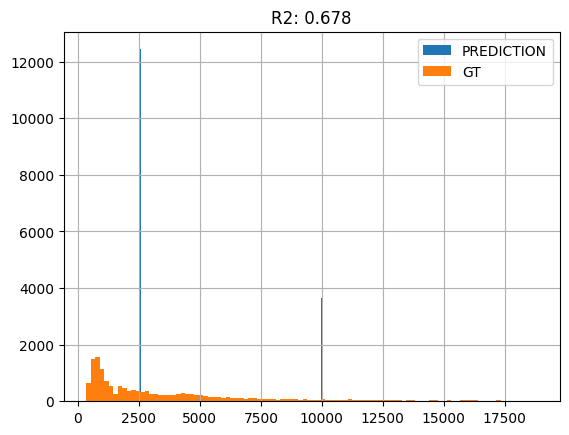

In [45]:
plt.title(f'R2: {str(score_mlp)[:5]}')
plt.hist(y_pred_mlp.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();